# Linear Regression With Python

# Let's perform some prediction

Hello Everyone!!!!! Welcome back to the course on Foundations of Artificial Intelligence.So far in the course. we have worked with the theoretical Part of Regression..in  perticularly we understood how Linear Regression is used to establish relationship between two variables...We use Linear Regression to predict the output or response to a variable

# Step :1 Import all the required python Libraries

In [5]:
import warnings
warnings.simplefilter("ignore")


* We need to import the ***warning module*** to ignore all the warnings

# Step:1.1 Import Pandas and Numpy Libraries

In [6]:
import numpy as np
import pandas as pd

* **Numpy**: Library is used for ***Numerical Computation***
* **NOTE**: Numpy mainly handles data in the form of **arrays**
* Best part of Numpy is ndarray(**n-dimensional array**)
* **Pandas**:Library is used for handling ***dataframes***
* **Note**:Pandas is used to structure the data properly with **proper indices**
* It is a **datamanipulation library**

# Step:1.2 Import DataVisualization Libraries

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* **Matplotlib**:Library is used for ***Data visualization***
* **Seaborn**:Library is used for **Statistical data visualization**
* **Note**: Some of the other ***datavisualization*** libraries in python are
            *Bokeh
            *Plotly
            *Seaborn
            *geoplotlib
            *pygal

# Step:2.0 Import Dataset
To Implement Simple Linear Regression, lets use the tips dataset which is an inbuild dataset of the seaborn library. Let's Understand the dataset

# How much Tip should i give in a hotel ?????????????????????

**<u>Problem Statement**
    Mr. Mark is having an issue with giving tips when he goes for dinner. He feels awkward if he tips less and feels robbed if he gives more. So being a nerdy Machine Learning Engineer, mark wants to predict how much tip should he give when he goes for dinner. For this analysis we can use the inbuit dataset provided by ***Seaborn*** libraries. This is an amazing feature for Machine Learning Engineers to work on sample datasets

In [8]:
tips=sns.load_dataset("tips")

# Print the dataset

In [9]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


# Let's Understand the Dataset

In [10]:
tips.shape

(244, 7)

Dataframe.shape is used to understand the dimensions of the dataset

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Dataframe.head() will give the first 5 rows of the dataset.This command is used to understand the dataset. This command is helpful when we have huge dataset. Similarly if you want to check the last few rows of the dataset then you can use Dataframe.tail() 

# Details about the Dataset
* **Total_bill** - The billed amount which is paid to the restaurant. The bill is in dollars
* **Tip** - The tip given when the corresponding bill was paid to the restaurant. Tip is in dollars
* **Sex** - The gender of the person who paid the bill
* **Smoker** - Is the person who paid the bill is a smoker or non smoker
* **Day** - On which day of the week did the person have dinner in the restaurant
* **time** - This column says whether a person had dinner or lunch at the restaurant
* **Size** - This column gives the information about how many people came along with the payer to the restaurant

# Slice the dataset

For our analysis, we will use only Total bill and the tip paid. For simple linear regression we use only one feature as our independent variable. So lets make a new dataset by slicing the original dataset with the first two columns

In [12]:
tip=tips.loc[:,["total_bill","tip"]]

In [13]:
tip

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


# DataVisualization

#### Let's understand the data by plotting scatter plot using the seaborn library

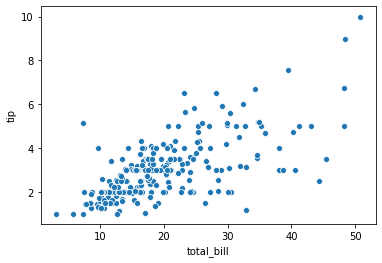

In [14]:
sns.scatterplot(data=tips,x="total_bill",y="tip")

# Lets reshape our dataset to a dataframe having 244 rows and 2 columns

In general, if we take x and y axis....the data on y axis is dependent on x axis.....y is called as a response to variable x. In our problem.....obviously the amount you tip is dependent on how much you eat or how much you paid......If its a really expensive dinner...you dont tip like a popper. So..........

* **X** = Total_bill paid in the restaurant (Independent Variable)
* **y** = tip (Dependent Variable)

In [26]:
X=tip.iloc[:,0].values.reshape(-1,1)

In [27]:
y=tip.iloc[:,-1].values.reshape(-1,1)

# Devide the dataset into training set and testing set

* To split the data, we need to use the command **train_test_split()**
* The function train_test_split() is present in the module model_selection of the library scikit learn. So lets import the required function

In [28]:
from sklearn.model_selection import train_test_split

The function splits the arrays into random subsets of training and testing data

* **We teach the system using the training set**
* **We evaluate the model using the test set**

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# Let's understand the command

The input parameters are :
* **the independent variable**
* **the dependent variable**
* **test_size** - what is the percentage of data is allocated for test set. 0.3 means 30% of dataset is randomly picked and allocatedas test set and remaining is allocated to training set
* randomstate controls shuffling of the dataset because the numbers are picked to allocate training set and test set....inorder to remove the human bias

Lets check how many elements are present in our training and testing set

In [30]:
X_train.shape

(170, 1)

In [31]:
y_train.shape

(170, 1)

In [32]:
X_test.shape

(74, 1)

In [33]:
y_test.shape

(74, 1)

### Let's Import the function for performing Linear Regression. The linear regression function is present in the linear model module of the scikit learn library 

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm=LinearRegression()

We call our Linear regression function with the object lm(). Now in order to 
figure the coefficients that map the response of dependent variable over a change in
independent variable is given by lm.fit. So we train our system with training set

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Let's Predict the amount to be tipped with our test set

We can use the lm.predict() function to predict 

In [37]:
y_pred=lm.predict(X_test)

In [38]:
y_pred

array([[2.93848107],
       [2.84360682],
       [2.07991605],
       [2.68673553],
       [2.14191309],
       [4.40480493],
       [2.30442047],
       [2.10433912],
       [1.89298559],
       [1.79811134],
       [3.73880646],
       [2.73370298],
       [3.23625472],
       [3.73692776],
       [2.31663201],
       [2.6209811 ],
       [2.33917638],
       [2.06300777],
       [2.68297813],
       [2.01134357],
       [3.352734  ],
       [1.81971636],
       [5.14219393],
       [2.40211277],
       [2.85018226],
       [2.12782285],
       [2.95351066],
       [2.63976808],
       [4.66876201],
       [2.65010092],
       [2.35326662],
       [2.32884354],
       [5.86549269],
       [2.73746038],
       [2.50262312],
       [2.65761571],
       [2.45659501],
       [5.25397646],
       [3.46827393],
       [3.03617337],
       [3.26255649],
       [3.76416888],
       [3.49363636],
       [3.18083313],
       [2.71397665],
       [2.26027106],
       [2.41432431],
       [4.795

In [39]:
Check=pd.DataFrame(X_test,columns=["Total_bill_test"])

In [40]:
Check

,Total_bill_test
0,19.65
1,18.64
2,10.51
3,16.97
4,11.17
...,...
69,10.34
70,8.35
71,23.95
72,34.63


In [41]:
Check["tip_actual"]=y_test

In [42]:
Check

,Total_bill_test,tip_actual
0,19.65,3.00
1,18.64,1.36
2,10.51,1.25
3,16.97,3.50
4,11.17,1.50
...,...,...
69,10.34,2.00
70,8.35,1.50
71,23.95,2.55
72,34.63,3.55


In [43]:
Check["tip_predicted"]=y_pred

In [44]:
Check

,Total_bill_test,tip_actual,tip_predicted
0,19.65,3.00,2.938481
1,18.64,1.36,2.843607
2,10.51,1.25,2.079916
3,16.97,3.50,2.686736
4,11.17,1.50,2.141913
...,...,...,...
69,10.34,2.00,2.063947
70,8.35,1.50,1.877017
71,23.95,2.55,3.342401
72,34.63,3.55,4.345626


# Lets Visualize the regressor line using the matplotlib library

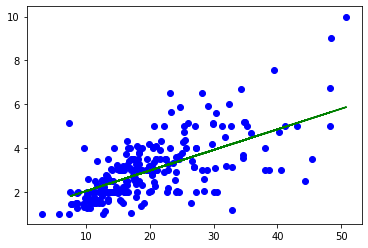

In [48]:
plt.scatter(X,y,color='blue')
plt.plot(X_test,y_pred,color='green')